In [68]:
import matplotlib as mpl
params = {'axes.spines.right': False,
          'axes.spines.top': False,
          'legend.fontsize': 12,
          'axes.labelsize': 12,
          'axes.titlesize': 12,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'pdf.fonttype': 42,
          'ps.fonttype': 42}
mpl.rcParams.update(params)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import nems.db as nd
from nems_lbhb.baphy_experiment import BAPHYExperiment
from nems.utils import smooth
from nems_lbhb import plots as nplt
from nems.xform_helper import load_model_xform

In [108]:
def get_rec(parmfile, cellid, rasterfs=1000, pupil=True):
    e = BAPHYExperiment(parmfile=parmfile, cellid=cellid)
    
    #t = cellid.split("-")
    #e.channels_to_load = [int(t[1])]
    #e.units_to_load = [int(t[2])]

    options={'resp': 1, 'rasterfs': rasterfs, 'pupil': pupil}
    
    rec = e.get_recording(**options)
    return rec

In [103]:
waveform_labels = pd.read_csv('phototag_waveform_labels.csv', index_col=0)


# PSTH analysis

Pick a run class

In [109]:
runclass='TOR'
rasterfs=100

runclass='CPN'
rasterfs=100

# runclass='FTC'
#rasterfs=500

sql="select sCellFile.*,gSingleCell.siteid,gSingleCell.phototag from gSingleCell INNER JOIN sCellFile ON gSingleCell.id=sCellFile.singleid" +\
   " INNER JOIN gRunClass on gRunClass.id=sCellFile.runclassid" +\
   f" WHERE gRunClass.name='{runclass}' AND not(isnull(phototag))"
d=nd.pd_query(sql)
d['parmfile']=d['stimpath']+d['stimfile']
print(len(d))
d.groupby('phototag').count()['cellid']

363


phototag
a     35
n    144
s    184
Name: cellid, dtype: int64

In [110]:
d['parmfile'].unique()

array(['/auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m',
       '/auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m',
       '/auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m',
       '/auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m',
       '/auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m',
       '/auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m'], dtype=object)

In [115]:
parmfile="/auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m"
cellid="TNC014a-01-2"

e = BAPHYExperiment(parmfile=parmfile, cellid=cellid)
options={'resp': 1, 'rasterfs': rasterfs,'pupil': True}    
rec = e.get_recording(**options)

[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC014a/TNC014a_504cfc5257f439947b08504c90202e1151a6e12e.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2911.13 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
/home/svd/bin/minicon

Load all A cells (sort of slow)

In [101]:
psth_a=[]
error_cellid=[]
for i, r in d.loc[d.phototag=='a'].iterrows():
    try:
        rec = get_rec(r.parmfile, r.cellid, rasterfs=500)
        rec['resp']=rec['resp'].rasterize()
        r=rec['resp'].extract_epoch('REFERENCE')
        psth_a.append(smooth(r.mean(axis=0)[0,:],5))
    except:
        error_cellid.append(r.cellid)


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC014a/TNC014a_963af78fd72e133caf2da6e7d1fb1c827f2cfa52.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found


AttributeError: 'numpy.ndarray' object has no attribute 'cellid'

Load all S cells (slower)

In [7]:
i_resp=[]
for i, r in d.loc[d.phototag=='s'].iterrows():
    try:
        rec = get_rec(r.parmfile, r.cellid, rasterfs=500)
        rec['resp']=rec['resp'].rasterize()
        r=rec['resp'].extract_epoch('REFERENCE')
        i_resp.append(smooth(r.mean(axis=0)[0,:],5))
    except:
        error_cellid.append(r.cellid)

[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC014a/TNC014a_2e775eabd6a87222656b2d942936daa5d4592787.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_expe

In [13]:
d.loc[d.phototag=='s']

,id,cellid,masterid,rawid,celldataid,runclassid,path,resplen,repcount,respfile,...,sortidx,model,stimsnr,area,goodtrials,respZ,respSNR,siteid,phototag,parmfile
0,140851,TNC014a-01-2,45704,143942,0,121,/auto/data/daq/Teonancatl/TNC014/sorted/,87359488,20,TNC014a09_p_CPN.spk.mat,...,1,0,1000,A1,,0.0,0.0,TNC014a,s,/auto/data/daq/Teonancatl/TNC014/TNC014a09_p_C...
1,140852,TNC014a-04-1,45704,143942,0,121,/auto/data/daq/Teonancatl/TNC014/sorted/,87359488,20,TNC014a09_p_CPN.spk.mat,...,1,0,1000,A1,,0.0,0.0,TNC014a,s,/auto/data/daq/Teonancatl/TNC014/TNC014a09_p_C...
2,140853,TNC014a-04-2,45704,143942,0,121,/auto/data/daq/Teonancatl/TNC014/sorted/,87359488,20,TNC014a09_p_CPN.spk.mat,...,1,0,1000,A1,,0.0,0.0,TNC014a,s,/auto/data/daq/Teonancatl/TNC014/TNC014a09_p_C...
3,140854,TNC014a-05-1,45704,143942,0,121,/auto/data/daq/Teonancatl/TNC014/sorted/,87359488,20,TNC014a09_p_CPN.spk.mat,...,1,0,1000,A1,,0.0,0.0,TNC014a,s,/auto/data/daq/Teonancatl/TNC014/TNC014a09_p_C...
4,140855,TNC014a-07-1,45704,143942,0,121,/auto/data/daq/Teonancatl/TNC014/sorted/,87359488,20,TNC014a09_p_CPN.spk.mat,...,1,0,1000,A1,,0.0,0.0,TNC014a,s,/auto/data/daq/Teonancatl/TNC014/TNC014a09_p_C...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,145187,TNC018a-45-1,45727,144212,0,121,/auto/data/daq/Teonancatl/TNC018/sorted/,87771136,20,TNC018a12_p_CPN.spk.mat,...,1,0,1000,A1,,0.0,0.0,TNC018a,s,/auto/data/daq/Teonancatl/TNC018/TNC018a12_p_C...
349,145188,TNC018a-46-1,45727,144212,0,121,/auto/data/daq/Teonancatl/TNC018/sorted/,87771136,20,TNC018a12_p_CPN.spk.mat,...,1,0,1000,A1,,0.0,0.0,TNC018a,s,/auto/data/daq/Teonancatl/TNC018/TNC018a12_p_C...
350,145189,TNC018a-46-2,45727,144212,0,121,/auto/data/daq/Teonancatl/TNC018/sorted/,87771136,20,TNC018a12_p_CPN.spk.mat,...,1,0,1000,A1,,0.0,0.0,TNC018a,s,/auto/data/daq/Teonancatl/TNC018/TNC018a12_p_C...
351,145190,TNC018a-48-1,45727,144212,0,121,/auto/data/daq/Teonancatl/TNC018/sorted/,87771136,20,TNC018a12_p_CPN.spk.mat,...,1,0,1000,A1,,0.0,0.0,TNC018a,s,/auto/data/daq/Teonancatl/TNC018/TNC018a12_p_C...


In [11]:
print('error cellids:', error_cellid)

error cellids: ['TNC014a-01-2', 'TNC014a-04-1', 'TNC014a-04-2', 'TNC014a-05-1', 'TNC014a-07-1', 'TNC014a-07-2', 'TNC014a-10-1', 'TNC014a-12-1', 'TNC014a-16-1', 'TNC014a-16-2', 'TNC014a-16-3', 'TNC014a-19-1', 'TNC014a-19-2', 'TNC014a-22-1', 'TNC014a-25-1', 'TNC014a-25-2', 'TNC014a-25-3', 'TNC014a-25-4', 'TNC014a-28-1', 'TNC014a-29-1', 'TNC014a-29-2', 'TNC014a-29-3', 'TNC014a-30-1', 'TNC014a-30-2', 'TNC014a-31-1', 'TNC014a-33-1', 'TNC014a-33-2', 'TNC014a-34-1', 'TNC014a-36-1', 'TNC014a-39-1', 'TNC014a-39-2', 'TNC014a-39-3', 'TNC014a-40-1']


ValueError: need at least one array to stack

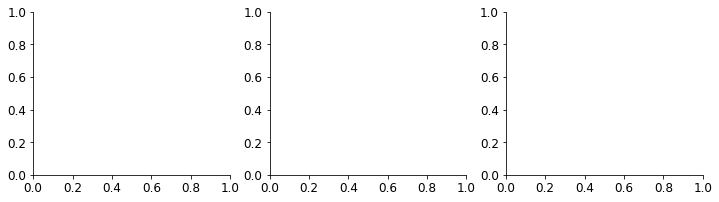

In [12]:
f,ax = plt.subplots(1,3,figsize=(12,3))

re=np.stack(e_resp) * rasterfs
ri=np.stack(i_resp) * rasterfs
ymax=np.ceil(np.max([re.max(), ri.max()])/10)*10
y0max=np.ceil(np.max([re[:,:50].max(), ri[:,:50].max()]))
print(ymax, y0max)
ax[0].plot(re.T);
ax[0].set_title(f'A n={re.shape[0]}')
ax[0].set_ylim([-5, ymax])

ax[1].plot(ri.T)
ax[1].set_title(f'S n={ri.shape[0]}');
ax[1].set_ylim([-5, ymax])

bins=np.linspace(0,y0max,10)
n0,b0 = np.histogram(re[:,:50].mean(axis=1), bins=bins)
n1,b1 = np.histogram(ri[:,:50].mean(axis=1), bins=bins)
n0= n0/n0.sum()
n1=n1/n1.sum()
w=(b0[1]-b0[0])/2.2
ax[2].bar(b0[:-1]-w/2,n0,width=w,label='A');
ax[2].bar(b0[:-1]+w/2,n1,width=w,label='S');
ax[2].legend(frameon=False);
ax[2].set_title('spont rate')
#f.suptitle(runclass)

32

# resp vs. pupil examples

In [272]:
# other S cells. potential examples
cellid_S="TNC016a-42-1"
cellid_S="TNC016a-45-1"
cellid_S="TNC016a-38-2"

cellid_S="TNC016a-30-1"
cellid_A="TNC016a-60-1"

runclass="CPN"
rasterfs=10  # or whatever rate you want

### EXAMPLE A CELL

In [273]:
cellid=cellid_A

df = nd.get_cell_files(cellid=cellid, runclass=runclass)
parmfile=df.loc[0,'stimpath']+df.loc[0,'stimfile']

e = BAPHYExperiment(parmfile=parmfile, cellid=cellid)
options={'resp': 1, 'rasterfs': rasterfs, 'pupil': True}    
rec = e.get_recording(**options)

[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC016a/TNC016a_47475e422d2041b868682c8fa7200c5ffd7c0fff.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found


Text(0.5, 0, 'Experiment time (s)')

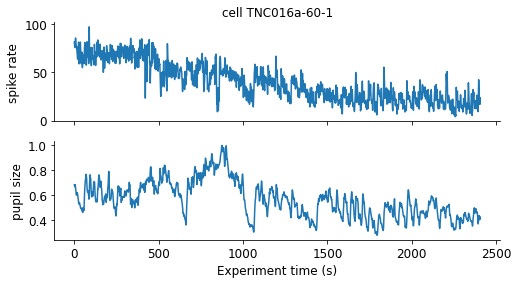

In [274]:
r=rec['resp'].rasterize().extract_epoch('REFERENCE')
resp=smooth(r.flatten(),50) * rasterfs

p=rec['pupil'].extract_epoch('REFERENCE')
pup = smooth(rec['pupil'].extract_epoch('REFERENCE').flatten(),50)
pup = pup / pup.max()

tt=np.arange(len(resp))/rasterfs

f,ax = plt.subplots(2,1,figsize=(8,4), sharex=True)
ax[0].plot(tt,resp)
ax[1].plot(tt,pup)
ax[0].set_title(f"cell {cellid}")
ax[0].set_ylabel("spike rate")
ax[1].set_ylabel("pupil size")
ax[1].set_xlabel("Experiment time (s)")

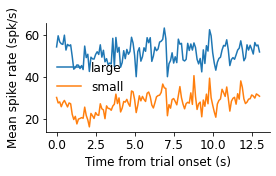

In [275]:
r=rec['resp'].rasterize().extract_epoch('TRIAL')
p=rec['pupil'].extract_epoch('TRIAL')
p=p.mean(axis=2)[:,0]
p_hi = p>np.median(p)
p_lo = p<=np.median(p)

psth_hi=r[p_hi,0,:].mean(axis=0) * rasterfs
psth_lo=r[p_lo,0,:].mean(axis=0) * rasterfs
tt=np.arange(len(psth_hi))/rasterfs

f,ax = plt.subplots(1,1,figsize=(4,2), sharex=True)
ax.plot(tt,psth_hi,label='large')
ax.plot(tt,psth_lo,label='small')
ax.legend(frameon=False)
ax.set_xlabel("Time from trial onset (s)")
ax.set_ylabel("Mean spike rate (spk/s)");

### EXAMPLE S CELL

In [276]:
cellid=cellid_S

df = nd.get_cell_files(cellid=cellid, runclass=runclass)
parmfile=df.loc[0,'stimpath']+df.loc[0,'stimfile']

e = BAPHYExperiment(parmfile=parmfile, cellid=cellid)
options={'resp': 1, 'rasterfs': rasterfs, 'pupil': True}    
rec = e.get_recording(**options)

[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC016a/TNC016a_67bd14ac8bc62dbda913a4ab3ac88820d2570a2d.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found


Text(0.5, 0, 'Experiment time (s)')

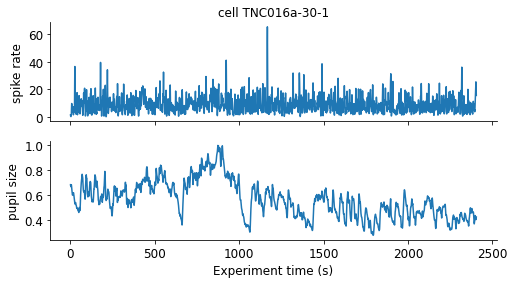

In [277]:
r=rec['resp'].rasterize().extract_epoch('REFERENCE')
resp=smooth(r.flatten(),50) * rasterfs

p=rec['pupil'].extract_epoch('REFERENCE')
pup = smooth(rec['pupil'].extract_epoch('REFERENCE').flatten(),50)
pup = pup / pup.max()

tt=np.arange(len(resp))/rasterfs

f,ax = plt.subplots(2,1,figsize=(8,4), sharex=True)
ax[0].plot(tt,resp)
ax[1].plot(tt,pup)
ax[0].set_title(f"cell {cellid}")
ax[0].set_ylabel("spike rate")
ax[1].set_ylabel("pupil size")
ax[1].set_xlabel("Experiment time (s)")

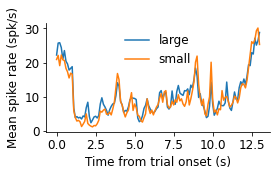

In [279]:
r=rec['resp'].rasterize().extract_epoch('TRIAL')
p=rec['pupil'].extract_epoch('TRIAL')
p=p.mean(axis=2)[:,0]
p_hi = p>np.median(p)
p_lo = p<=np.median(p)

psth_hi=r[p_hi,0,:].mean(axis=0) * rasterfs
psth_lo=r[p_lo,0,:].mean(axis=0) * rasterfs
tt=np.arange(len(psth_hi))/rasterfs

f,ax = plt.subplots(1,1,figsize=(4,2), sharex=True)
ax.plot(tt,psth_hi,label='large')
ax.plot(tt,psth_lo,label='small')
ax.legend(frameon=False)
ax.set_xlabel("Time from trial onset (s)")
ax.set_ylabel("Mean spike rate (spk/s)");

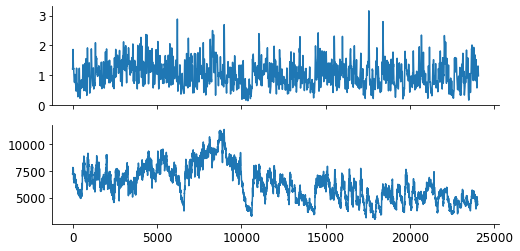

# pupil pred

In [284]:
runclass='NAT'
rasterfs=10
runclass='CPN'
rasterfs = 10

sql="select sCellFile.*,gSingleCell.siteid,gSingleCell.phototag from gSingleCell INNER JOIN sCellFile ON gSingleCell.id=sCellFile.singleid" +\
   " INNER JOIN gRunClass on gRunClass.id=sCellFile.runclassid" +\
   f" WHERE gRunClass.name='{runclass}' AND not(isnull(phototag))"
d=nd.pd_query(sql)
d['parmfile']=d['stimpath']+d['stimfile']

print(d.shape)

d=d[['cellid','phototag']].drop_duplicates()
d=d.set_index('cellid')

print(d.shape)


(363, 43)
(363, 1)


In [285]:
if runclass=='CPN':
    #modelnames = ['psth.fs20.pup-ld-st.pup0-epcpn.seq-hrc-psthfr_sdexp2.S_jk.nf20-basic',
    #              'psth.fs20.pup-ld-st.pup-epcpn.seq-hrc-psthfr_sdexp2.S_jk.nf20-basic']
    modelnames = ['psth.fs20.pup-ld-st.pup0-epcpn-hrc-psthfr_sdexp2.S_jk.nf20-basic',
                  'psth.fs20.pup-ld-st.pup-epcpn-hrc-psthfr_sdexp2.S_jk.nf20-basic']
    modelnames = ['psth.fs20.pup-ld-st.pup0-epcpn-hrc-psthfr_stategain.S_jk.nf20-basic',
                  'psth.fs20.pup-ld-st.pup-epcpn-hrc-psthfr_stategain.S_jk.nf20-basic']
    batch=331
else:
    batch=322
    modelnames = [f'psth.fs{rasterfs}.pup-ld-st.pup0-hrc-psthfr_stategain.S_jk.nf20-basic',
                  f'psth.fs{rasterfs}.pup-ld-st.pup-hrc-psthfr_stategain.S_jk.nf20-basic',
                ]

In [286]:
dpred = nd.batch_comp(batch=batch,modelnames=modelnames)
dpred = dpred.merge(d['phototag'],how='inner',left_index=True, right_index=True)
dpred['siteid'] = dpred.index
dpred['siteid']=dpred['siteid'].apply(nd.get_siteid)
dpred['diff'] = dpred[modelnames[1]]-dpred[modelnames[0]]

dpred=dpred.merge(waveform_labels[['cellid','wshape']],how='left',left_index=True, right_on='cellid').set_index('cellid')
#dpred['wshape']=dpred['wshape'].fillna("?")
dpred['pw'] = dpred['phototag']+" "+dpred['wshape']

dmean=dpred.groupby('phototag').mean()  # .reset_index()
dcount=dpred.groupby('phototag').count()  # .reset_index()
dcount['n']=dcount[modelnames[0]]
dmean=dmean.merge(dcount['n'],how='inner',left_index=True, right_index=True)
dmean['label'] = [f"{i[0].upper()} n={r.n:.0f} delta={r['diff']:.3f}" for i,r in dmean.iterrows()]
dpred=dpred.merge(dmean[['label']],how='inner',left_on='phototag', right_index=True)

dmean=dpred.groupby(['pw']).mean()  # .reset_index()
dcount=dpred.groupby(['pw']).count()  # .reset_index()
dcount['n']=dcount[modelnames[0]]
dmean=dmean.merge(dcount['n'],how='inner',left_index=True, right_index=True)
dmean['label2'] = [f"{i.upper()} n={r.n:.0f} delta={r['diff']:.3f}" for i,r in dmean.iterrows()]
dpred=dpred.merge(dmean[['label2']],how='inner',left_on=['pw'], right_index=True)

dpred['g']=1
dpred['d']=0

In [287]:
dpred.loc[(dpred['phototag']=='s') & (dpred['siteid']=='TNC016a')].sort_values(by='diff')

,psth.fs20.pup-ld-st.pup0-epcpn-hrc-psthfr_stategain.S_jk.nf20-basic,psth.fs20.pup-ld-st.pup-epcpn-hrc-psthfr_stategain.S_jk.nf20-basic,phototag,siteid,diff,wshape,pw,label,label2,g,d
cellid,,,,,,,,,,,
TNC016a-30-2,0.282351,0.281947,s,TNC016a,-0.000404,RS,s RS,S n=160 delta=0.011,S RS n=124 delta=0.011,1,0
TNC016a-33-1,0.319517,0.319334,s,TNC016a,-0.000183,RS,s RS,S n=160 delta=0.011,S RS n=124 delta=0.011,1,0
TNC016a-26-1,0.274210,0.274701,s,TNC016a,0.000491,RS,s RS,S n=160 delta=0.011,S RS n=124 delta=0.011,1,0
TNC016a-43-1,0.276222,0.276862,s,TNC016a,0.000640,RS,s RS,S n=160 delta=0.011,S RS n=124 delta=0.011,1,0
TNC016a-45-1,0.228268,0.229260,s,TNC016a,0.000992,RS,s RS,S n=160 delta=0.011,S RS n=124 delta=0.011,1,0
TNC016a-30-1,0.350330,0.351801,s,TNC016a,0.001471,RS,s RS,S n=160 delta=0.011,S RS n=124 delta=0.011,1,0
TNC016a-29-1,0.225494,0.227431,s,TNC016a,0.001937,RS,s RS,S n=160 delta=0.011,S RS n=124 delta=0.011,1,0
TNC016a-49-1,0.208638,0.210847,s,TNC016a,0.002209,RS,s RS,S n=160 delta=0.011,S RS n=124 delta=0.011,1,0
TNC016a-16-1,0.271580,0.277873,s,TNC016a,0.006294,RS,s RS,S n=160 delta=0.011,S RS n=124 delta=0.011,1,0


In [288]:
for cellid in dpred.index:
    xf,ctx=load_model_xform(cellid=cellid,modelname=modelnames[1],batch=batch,eval_model=False)
    dpred.loc[cellid,'d']=ctx['modelspec'].phi[0]['d'][0,1]
    dpred.loc[cellid,'g']=ctx['modelspec'].phi[0]['g'][0,1]

[nems.xforms INFO] Loading xfspec and context from /auto/data/nems_db/results/331/TNC013a-01-2/psth.fs20.pup-ld-st.pup-epcpn-hrc-psthfr.stategain.S.jk.nf20-basic.2021-09-16T220425 ...
[nems.xforms INFO] Loading xfspec and context from /auto/data/nems_db/results/331/TNC013a-10-1/psth.fs20.pup-ld-st.pup-epcpn-hrc-psthfr.stategain.S.jk.nf20-basic.2021-09-16T220437 ...
[nems.xforms INFO] Loading xfspec and context from /auto/data/nems_db/results/331/TNC013a-12-1/psth.fs20.pup-ld-st.pup-epcpn-hrc-psthfr.stategain.S.jk.nf20-basic.2021-09-16T220443 ...
[nems.xforms INFO] Loading xfspec and context from /auto/data/nems_db/results/331/TNC013a-20-1/psth.fs20.pup-ld-st.pup-epcpn-hrc-psthfr.stategain.S.jk.nf20-basic.2021-09-16T220458 ...
[nems.xforms INFO] Loading xfspec and context from /auto/data/nems_db/results/331/TNC013a-22-1/psth.fs20.pup-ld-st.pup-epcpn-hrc-psthfr.stategain.S.jk.nf20-basic.2021-09-16T220501 ...
[nems.xforms INFO] Loading xfspec and context from /auto/data/nems_db/results/33

In [289]:
dpred.groupby(['pw']).count()

,psth.fs20.pup-ld-st.pup0-epcpn-hrc-psthfr_stategain.S_jk.nf20-basic,psth.fs20.pup-ld-st.pup-epcpn-hrc-psthfr_stategain.S_jk.nf20-basic,phototag,siteid,diff,wshape,label,label2,g,d
pw,,,,,,,,,,
a NS,18,18,18,18,18,18,18,18,18,18
a RS,12,12,12,12,12,12,12,12,12,12
s NS,25,25,25,25,25,25,25,25,25,25
s RS,124,124,124,124,124,124,124,124,124,124


In [290]:
dpred['diff'] = dpred[modelnames[1]]-dpred[modelnames[0]]
dm = dpred.groupby(['siteid','phototag']).mean()
dmc = dpred.groupby(['siteid','phototag']).count()

dm = dm[['diff']].merge(dmc['label'],how='inner',left_index=True, right_index=True)

In [291]:
dmc

psth.fs20.pup-ld-st.pup0-epcpn-hrc-psthfr_stategain.S_jk.nf20-basic  \
siteid  phototag                                                                        
TNC013a a                                                        10                     
        s                                                        13                     
TNC014a a                                                         1                     
        s                                                        36                     
TNC015a a                                                         5                     
        s                                                        12                     
TNC016a a                                                         5                     
        s                                                        15                     
TNC017a a                                                         1                     
        s                                                        29                     
TNC018a a                                                         8                     
        s                                                        44                     

                  psth.fs20.pup-ld-st.pup-epcpn-hrc-psthfr_stategain.S_jk.nf20-basic  \
siteid  phototag                                                                       
TNC013a a                                                        10                    
        s                                                        13                    
TNC014a a                                                         1                    
        s                                                        36                    
TNC015a a                                                         5                    
        s                                                        12                    
TNC016a a                                                         5                    
        s                                                        15                    
TNC017a a                                                         1                    
        s                                                        29                    
TNC018a a                                                         8                    
        s                                                        44                    

                  diff  wshape  pw  label  label2   g   d  
siteid  phototag                                           
TNC013a a           10      10  10     10      10  10  10  
        s           13      13  13     13      13  13  13  
TNC014a a            1       1   1      1       1   1   1  
        s           36      36  36     36      36  36  36  
TNC015a a            5       5   5      5       5   5   5  
        s           12      12  12     12      12  12  12  
TNC016a a            5       5   5      5       5   5   5  
        s           15      15  15     15      15  15  15  
TNC017a a            1       1   1      1       1   1   1  
        s           29      29  29     29      29  29  29  
TNC018a a            8       8   8      8       8   8   8  
        s           44      44  44     44      44  44  44

#### Summary plots A: pupil contribution to model prediction. B: pupil-dependent dc and gain. Broken down by A vs. S

Text(0.5, 0.98, 'psth.fs20.pup-ld-st.pup-epcpn-hrc-psthfr_stategain.S_jk.nf20-basic')

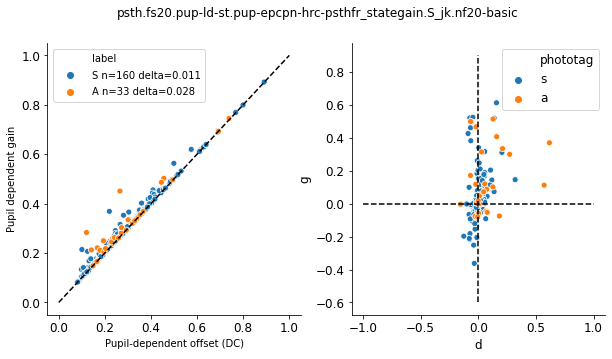

In [293]:
from seaborn import scatterplot, barplot

sa_subset = dpred.loc[(dpred.phototag=='a') | (dpred.phototag=='s')]

f,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot([0.0,1],[0.0,1],'k--')
scatterplot(data=sa_subset, x=modelnames[0], y=modelnames[1], hue='label', ax=ax[0]);
plt.setp(ax[0].get_legend().get_texts(), fontsize='10'); #, frameon=False)
ax[0].set_xlabel('Pupil shuffled',fontsize=10)
ax[0].set_ylabel('Pupil dependent dc+gain',fontsize=10)

ax[1].plot([-1,1],[0.0,0],'k--')
ax[1].plot([0.0,0],[-0.6,0.9],'k--')
scatterplot(data=sa_subset, x='d', y='g', hue='phototag', ax=ax[1]);
ax[0].set_xlabel('Pupil-dependent offset (DC)',fontsize=10)
ax[0].set_ylabel('Pupil dependent gain',fontsize=10)

f.suptitle(modelnames[1])

### break down by site.

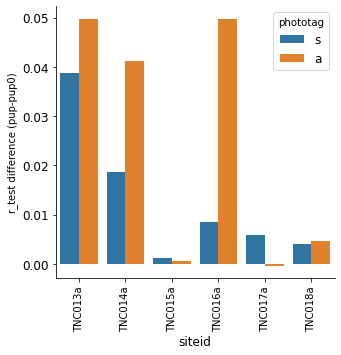

In [283]:
f,ax=plt.subplots(1,1,figsize=(5,5))
barplot(data=dm.reset_index(), x='siteid', y='diff', hue='phototag', ax=ax, hue_order=['s','a'])
plt.setp(ax.get_xticklabels(), fontsize='10', rotation=90); #, frameon=False)
ax.set_ylabel('r_test difference (pup-pup0)',fontsize=10);

In [91]:
dpred.loc[dpred.phototag=='s',['diff','d','g']]

,diff,d,g
cellid,,,
TNC013a-01-2,0.034821,-0.025267,-0.000350
TNC013a-10-1,0.002883,-0.003755,0.000109
TNC013a-12-1,0.003088,-0.011791,0.183123
TNC013a-20-1,0.081789,0.156850,0.612061
TNC013a-22-1,0.013490,0.002717,0.339027
...,...,...,...
TNC015a-22-1,0.000128,0.005313,-0.009555
TNC015a-22-2,-0.000296,-0.005902,-0.041073
TNC015a-30-1,0.000967,-0.019096,-0.022380
